In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
dt = pd.read_csv('./customer_churn.csv')
dt.sample(5) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1761,5356-KZCKT,Male,0,No,No,58,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1513.6,No
2968,0258-NOKBL,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.40,268.45,No
149,3466-BYAVD,Male,0,Yes,Yes,15,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.4,No
427,8734-DKSTZ,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,85.95,858.6,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [8]:
dt.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
(5174*100)/dt.shape[0] //tinh ty le phan tram khch hang churn

73.46301292063042

In [11]:
dt.drop('customerID',axis = 1,inplace = True)

In [13]:
dt.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
pd.to_numeric(dt.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
dt.shape[0]

7043

In [16]:
dt[pd.to_numeric(dt.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [33]:
dt[dt.TotalCharges != ' '].shape

(7032, 20)

In [34]:
dtNEws = dt[dt.TotalCharges != ' ']
dtNEws.shape

(7032, 20)

In [35]:
dtNEws.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
dtNEws.shape

(7032, 20)

In [37]:
dtNEws.TotalCharges = pd.to_numeric(dtNEws.TotalCharges)

C:\Users\maith\AppData\Local\Temp\ipykernel_17232\1406258868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtNEws.TotalCharges = pd.to_numeric(dtNEws.TotalCharges)


In [38]:
dtNEws.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [39]:
dtNEws.shape

(7032, 20)

In [40]:
dtNEws[dtNEws.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [41]:
###Data Visualization

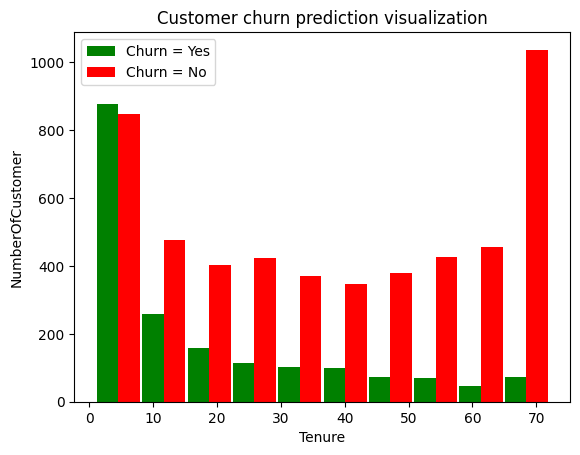

In [47]:
tenureChurnYes = dtNEws[dtNEws.Churn == 'Yes'].tenure
tenueChurnNo  = dtNEws[dtNEws.Churn == 'No'].tenure

plt.xlabel('Tenure')
plt.ylabel('NumberOfCustomer')
plt.title('Customer churn prediction visualization')

plt.hist([tenureChurnYes,tenueChurnNo] , rwidth = 0.95 , color = ['green','red'] , label = ['Churn = Yes','Churn = No'])
plt.legend()

In [51]:
def PrintUnique(dtNEws):
    for column in dtNEws:
        if(dtNEws[column].dtypes == 'object'):
            print(f'{column} : {dtNEws[column].unique()} ')


In [52]:
PrintUnique(dtNEws)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [54]:
dtNEws.replace('No phone service','No',inplace=True)
dtNEws.replace('No internet service','No',inplace=True)


C:\Users\maith\AppData\Local\Temp\ipykernel_17232\2415779587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtNEws.replace('No phone service','No',inplace=True)
C:\Users\maith\AppData\Local\Temp\ipykernel_17232\2415779587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtNEws.replace('No internet service','No',inplace=True)


In [55]:
PrintUnique(dtNEws)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes'] 
OnlineBackup : ['Yes' 'No'] 
DeviceProtection : ['No' 'Yes'] 
TechSupport : ['No' 'Yes'] 
StreamingTV : ['No' 'Yes'] 
StreamingMovies : ['No' 'Yes'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [56]:
YesNoColumn = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in YesNoColumn:
    dtNEws[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\maith\AppData\Local\Temp\ipykernel_17232\3078278438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtNEws[col].replace({'Yes':1,'No':0},inplace=True)


In [59]:
for col in dtNEws:
    print(f'{col} : {dtNEws[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [60]:
dtNEws['gender'].replace({'Female':1,'Male':0},inplace=True)
dtNEws.gender.unique()

C:\Users\maith\AppData\Local\Temp\ipykernel_17232\1356211449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtNEws['gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0], dtype=int64)

In [73]:
dtNews2 = pd.get_dummies(data = dtNEws,columns= ['InternetService','Contract','PaymentMethod'],dtype = int)
dtNews2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [74]:
dtNews2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6492,0,0,1,0,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
280,1,0,0,0,6,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
606,0,0,1,1,38,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
293,1,1,0,0,6,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1954,0,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [77]:
colsToScale =['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dtNews2[colsToScale] = scaler.fit_transform(dtNews2[colsToScale])

In [78]:
for col in colsToScale:
    print(f'{col} : {dtNews2[col].unique()}')

tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
MonthlyCharges : [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges : [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.78764136]


In [84]:
x = dtNews2.drop('Churn',axis=1)
y  = testLabels = dtNews2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

In [85]:
X_test.shape

(1407, 26)

In [86]:
X_train.shape

(5625, 26)

In [87]:
y_train.value_counts()

Churn
0.0    4115
1.0    1510
Name: count, dtype: int64

In [88]:
y_test.value_counts()

Churn
0.0    1048
1.0     359
Name: count, dtype: int64

In [89]:
from sklearn.linear_model import LogisticRegression


In [92]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(y_predict)

[1. 0. 1. ... 0. 0. 1.]


In [94]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.814498933901919


In [97]:
from sklearn.metrics import classification_report
acc = model.score(X_test,y_test)
print(acc)

clRep = classification_report(y_test,y_predict)
print(clRep)

0.814498933901919
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      1048
         1.0       0.65      0.58      0.62       359

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407

